<a href="https://colab.research.google.com/github/ananyavaidya7/Brain-Tumor-Detection-using-CNN-project/blob/main/DNN_LCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPU Available: []
Train Classes: ['no_tumor', 'tumor']
Test Classes: ['no_tumor', 'tumor']
Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Class Mapping: {'no_tumor': 0, 'tumor': 1}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4755 - loss: 0.7812 - val_accuracy: 0.7451 - val_loss: 0.5138
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6848 - loss: 0.6220 - val_accuracy: 0.8627 - val_loss: 0.4746
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7110 - loss: 0.5648 - val_accuracy: 0.8627 - val_loss: 0.4569
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7482 - loss: 0.5336 - val_accuracy: 0.9020 - val_loss: 0.3716
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7256 - loss: 0.5540 - val_accuracy: 0.8824 - val_loss: 0.5146
Epoch 6/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7446 - loss: 0.5148 - val_accuracy: 0.9020 - val_loss: 0.4042
Epoch 7/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7974 - loss: 0.4500 - val_accuracy: 0.8627 - val_loss: 0.4098
Epoch 8/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8077 - loss: 0.3918 - val_accuracy: 0.7647 - val_loss:

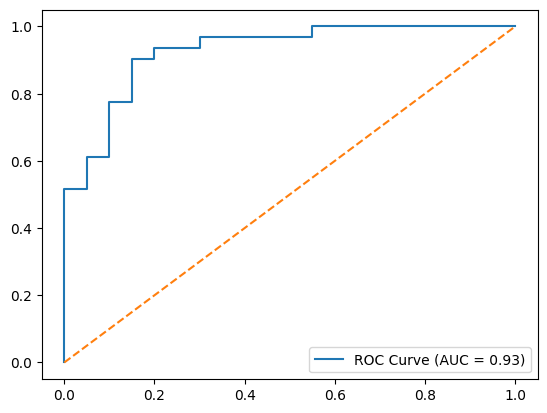

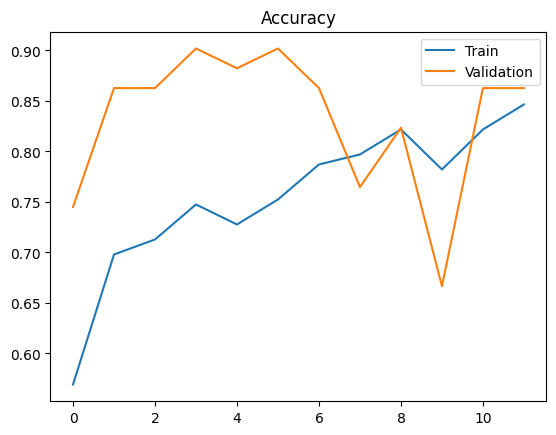

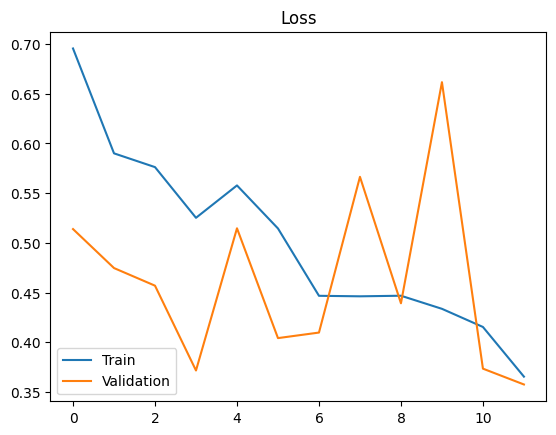

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

Prediction: NO TUMOR

Model saved locally in Colab


In [ ]:
# =============================================================
# COMPLETE BRAIN TUMOR CLASSIFICATION PIPELINE (COLAB LOCAL FILES)
# =============================================================

# -------------------------
# Unzip Dataset (after uploading BrainTumor.zip)
# -------------------------
!unzip -oq BrainTumor.zip

# -------------------------
#  Imports
# -------------------------
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


# -------------------------
# Dataset Path (LOCAL COLAB)
# -------------------------
BASE_PATH = "/content/BrainTumor"
TRAIN_PATH = os.path.join(BASE_PATH, "train")
TEST_PATH  = os.path.join(BASE_PATH, "test")

print("Train Classes:", os.listdir(TRAIN_PATH))
print("Test Classes:", os.listdir(TEST_PATH))

# -------------------------
#  Settings
# -------------------------
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 12

# -------------------------
#  Data Generators
# -------------------------
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=BATCH_SIZE,
    shuffle=False
)

print("Class Mapping:", train_data.class_indices)

# -------------------------
# CNN Model
# -------------------------
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,1)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -------------------------
# Train
# -------------------------
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data
)

# -------------------------
#  Evaluate
# -------------------------
loss, acc = model.evaluate(test_data)
print("\nFinal Test Accuracy:", acc)

# -------------------------
#  Confusion Matrix
# -------------------------
true_labels = test_data.classes
pred_probs = model.predict(test_data)
pred_labels = (pred_probs > 0.5).astype(int).reshape(-1)

print("\nConfusion Matrix:\n", confusion_matrix(true_labels, pred_labels))
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels))

# -------------------------
#  ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(true_labels, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.show()

# -------------------------
#  Training Graphs
# -------------------------
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Validation'])
plt.show()

# -------------------------
#  Single Image Prediction
# -------------------------
sample_class = os.listdir(TEST_PATH)[0]
sample_image = os.listdir(os.path.join(TEST_PATH, sample_class))[0]
sample_path = os.path.join(TEST_PATH, sample_class, sample_image)

img = image.load_img(sample_path, target_size=(224,224), color_mode="grayscale")
img = image.img_to_array(img)/255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

if prediction[0][0] > 0.5:
    print("\nPrediction: TUMOR")
else:
    print("\nPrediction: NO TUMOR")

# -------------------------
#  Save Model (Colab session)
# -------------------------
model.save("/content/brain_tumor_model.keras")

